# Project Summary

Ricardo B. Garcia (rbgarcia@gmail.com)

**The dataset:** https://www.kaggle.com/competitions/rossmann-store-sales/data

|    Attribute    |                         Meaning                         |
| :-------------: | :----------------------------------------------------------: |
|       id             |An Id that represents a (Store, Date) duple within the test set|
|      store           |A unique Id for each store|
|      sales           |The turnover for any given day (this is what you are predicting)|
|    customers         |The number of customers on a given day|
|    open              |An indicator for whether the store was open: 0 = closed, 1 = open|
|   state_holiday      |Indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None|
|    school_holiday    |Indicates if the (Store, Date) was affected by the closure of public schools     |
|     store_type       |Differentiates between 4 different store models: a, b, c, d|
|   assortment         |Describes an assortment level: a = basic, b = extra, c = extended|
| competition_distance |Distance in meters to the nearest competitor store|
|competition_open_since|Gives the approximate year and month of the time the nearest competitor was opened|
|      promo           |Indicates whether a store is running a promo on that day|
|  promo2              |Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating|
|  promo2_since        |Describes the year and calendar week when the store started participating in Promo2|
|    promo_interval    |Describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store|

# Project development

# Libraries

In [1]:
import inflection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import datetime as dt

## General settings

In [2]:
# Values up to 2 decimals 0.00
pd.set_option('display.float_format', '{:.2f}'.format )
# plots with seaborn style
plt.style.use('seaborn')

# Data

Here, we load the original datasets.

In [3]:
df_sales_raw = pd.read_csv('data/train.csv', low_memory=False)
df_stores_raw = pd.read_csv('data/store.csv', low_memory=False)

# Merge datasets
data = pd.merge(df_sales_raw, df_stores_raw, how='left', on='Store')

# 
del df_sales_raw
del df_stores_raw

In [4]:
print('Rows:', data.shape[0])
print('Columns:', data.shape[1])
display(data.head())

Rows: 1017209
Columns: 18


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.00,9.00,2008.00,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.00,11.00,2007.00,1,13.00,2010.00,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.00,12.00,2006.00,1,14.00,2011.00,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.00,9.00,2009.00,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.00,4.00,2015.00,0,NaN,NaN,NaN


### Rename columns: from camel case to snake case

In [5]:
data.columns = [inflection.underscore(item) for item in data.columns]
print(data.columns)

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')


## Data consistency

Here, we verify the dataset consistency: data types, duplicates, missing values, number of unique values per column, and range of data distribution. 

### Types

In [6]:
dtypes = data.dtypes.reset_index()
dtypes.columns = ['column', 'type']
dtypes['first_row'] = data.head(1).T.reset_index()[0]
display(dtypes)

,column,type,first_row
0,store,int64,1
1,day_of_week,int64,5
2,date,object,2015-07-31
3,sales,int64,5263
4,customers,int64,555
5,open,int64,1
6,promo,int64,1
7,state_holiday,object,0
8,school_holiday,int64,1
9,store_type,object,c


<b>Note:</b> The column `date` should be converted to datetime. 

### Duplicates

In [7]:
n_duplicates = data.shape[0] - data.drop_duplicates().shape[0]
print('Number of duplicated data:', n_duplicates)

Number of duplicated data: 0


<b>Note:</b> No duplicated data.

### Missing

In [8]:
df_missing = data.isna().sum().reset_index()
df_missing.columns = ['column', 'missing values']
display(df_missing)

,column,missing values
0,store,0
1,day_of_week,0
2,date,0
3,sales,0
4,customers,0
5,open,0
6,promo,0
7,state_holiday,0
8,school_holiday,0
9,store_type,0


#### Missing data
`competition_distance`: 2642 cases do not have information about distance to the nearest competitor store. Treatment: we may assume the absence of near competitor stores, so we can set a distance that is larger than the observed near competitors. 

`competition_open`: 323348 cases do not have the approximate year and month of the time the nearest competitor was opened

`promo2_since[month/year]` and `promo_interval`: 508031 cases do not have information.



### Unique values

Verifying the number of unique values for each column.

In [9]:
# Create DF with number of unique values
df_unique = data.nunique().reset_index()
df_unique.columns = ['column', 'unique values']
df_unique.sort_values('unique values', inplace=True)

# Add a column with the unique values if .nunique() <= 4 (less or equal 4)
loe_4 = df_unique[df_unique['unique values']<=4].index # get column indexes
for c in loe_4:
    col = df_unique.loc[c,'column']
    df_unique.loc[c, 'values'] = str(sorted(data.loc[:, col].dropna().unique()))
df_unique

display(df_unique)

,column,unique values,values
8,school_holiday,2,"[0, 1]"
14,promo2,2,"[0, 1]"
6,promo,2,"[0, 1]"
5,open,2,"[0, 1]"
10,assortment,3,"['a', 'b', 'c']"
17,promo_interval,3,"['Feb,May,Aug,Nov', 'Jan,Apr,Jul,Oct', 'Mar,Ju..."
7,state_holiday,4,"['0', 'a', 'b', 'c']"
9,store_type,4,"['a', 'b', 'c', 'd']"
16,promo2_since_year,7,NaN
1,day_of_week,7,NaN


### Data distributions

In [10]:
to_drop = ['store', 'day_of_week', 'open', 'promo', 
           'school_holiday', 'competition_open_since_month', 'promo2']
description = data.drop(to_drop, axis=1).describe().loc[['min', '25%', '50%', '75%', 'max']].T
display(description)

,min,25%,50%,75%,max
sales,0.00,3727.00,5744.00,7856.00,41551.00
customers,0.00,405.00,609.00,837.00,7388.00
competition_distance,20.00,710.00,2330.00,6890.00,75860.00
competition_open_since_year,1900.00,2006.00,2010.00,2013.00,2015.00
promo2_since_week,1.00,13.00,22.00,37.00,50.00
promo2_since_year,2009.00,2011.00,2012.00,2013.00,2015.00


# Data transformation

Here, we implement data transformation according to the data consistency verification and the project's assumptions.

### Data type adjustment

In [11]:
# Adjusting dates
data['date'] = pd.to_datetime(data['date'])

# Verifying
display(data[['date']].dtypes)
display(data[['date']].head(3))

date    datetime64[ns]
dtype: object

,date
0,2015-07-31
1,2015-07-31
2,2015-07-31


### Treatment of missing data

#### Competition distance

In [12]:
max_distance = data['competition_distance'].max()
print('Maximum competition distance observed:', max_distance)

Maximum competition distance observed: 75860.0


In [13]:
data.loc[data['competition_distance'].isna(), 'competition_distance'] = 2 * max_distance

#### Competition open since month/year
if competition_distance == 2 * max_distance

In [15]:
# Get the stores with missing data
stores = sorted(data.loc[data['competition_open_since_month'].isna(), 'store' ].unique())
print('Number of stores with missing competition open since month/year:', len(stores))

Number of stores with missing competition open since month/year: 354


In [16]:
# Define columns names
col1 = 'competition_open_since_month'
col2 = 'competition_open_since_year'

# Insert
for st in stores:
    data.loc[data['store'] == st, col1] = data.loc[st,'date'].month
    data.loc[data['store'] == st, col2] = data.loc[st,'date'].year

#### promo2 since week/year

In [17]:
stores_wo_promo2 = sorted(data.loc[data['promo2']==0, 'store'].unique())
print('Number of stores without promo2:', len(stores_wo_promo2))

Number of stores without promo2: 544


In [18]:
# Define columns names
col1 = 'promo2_since_week'
col2 = 'promo2_since_year'

# Insert
data.loc[data['promo2']==0, col1] = data.loc[data['promo2']==0, 'date'].dt.isocalendar().week
data.loc[data['promo2']==0, col2] = data.loc[data['promo2']==0, 'date'].dt.isocalendar().year

#### promo interval

In [19]:
month_map = {1: 'Jan',  2: 'Feb',  3: 'Mar',  4: 'Apr',  5: 'May',  6: 'Jun',  
             7: 'Jul',  8: 'Aug',  9: 'Sep',  10: 'Oct', 11: 'Nov', 12: 'Dec'}

data['month_map'] = data['date'].dt.month.map( month_map )

In [20]:
# Fillna
data['promo_interval'].fillna(0, inplace=True )

In [21]:
data['is_promo'] = data['promo_interval'].apply(lambda x: 1 if x !=0 else 0)

#### Verifying missing data

In [22]:
data.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

### Feature adjustments

In [25]:
# Year
data['year'] = data['date'].dt.year

# Month
data['month'] = data['date'].dt.month

# Day
data['day'] = data['date'].dt.day

# Week of year
data['week_of_year'] = data['date'].dt.isocalendar().week

# Competition since
col1 = 'competition_open_since_year'
col2 = 'competition_open_since_month'
data['competition_since'] = pd.to_datetime( data[col1].map(str) + '-' + data[col2].map(str) )

#
data['competition_time_month'] = ((data['date'] - data['competition_since']).dt.days/30).astype(int)

# Promo since
col1 = 'promo2_since_year'
col2 = 'promo2_since_week'
data['promo2_since'] = data[col1].map(str) + '-' + data[col2].map(str) + '-1'
data['promo2_since'] = data['promo2_since'].apply( lambda x: dt.datetime.strptime(x, '%Y-%W-%w') - dt.timedelta(days=7))

# Assortment
data['assortment'] = data['assortment'].map({'a':'basic', 
                                             'b':'extra', 
                                             'c':'extended'})

# State holiday
data['state_holiday'] = data['state_holiday'].map({'0':'regular_day', 
                                                   'a':'public_holiday', 
                                                   'b':'easter_holiday', 
                                                   'c':'christimas_holiday'})

### Adjusting data types

In [26]:
data['competition_distance'] = data['competition_distance'].astype(int)
data['competition_open_since_month'] = data['competition_open_since_month'].astype(int)
data['competition_open_since_year'] = data['competition_open_since_year'].astype(int)
data['promo2_since_week'] = data['promo2_since_week'].astype(int)
data['promo2_since_year'] = data['promo2_since_year'].astype(int)

In [27]:
dtypes = data.dtypes.reset_index()
dtypes.columns = ['column', 'type']
dtypes['first_row'] = data.head(1).T.reset_index()[0]
display(dtypes)

,column,type,first_row
0,store,int64,1
1,day_of_week,int64,5
2,date,datetime64[ns],2015-07-31 00:00:00
3,sales,int64,5263
4,customers,int64,555
5,open,int64,1
6,promo,int64,1
7,state_holiday,object,regular_day
8,school_holiday,int64,1
9,store_type,object,c



# Exploratory Data Analysis

Now, the dataset is ready for exploratory analyses. For summarizing real estate prices, we adopted the median as the central tendency measure, since the means may be skewed due to the presence of extreme values.

In [28]:
# Overview of the data
print('Rows:', data.shape[0])
print('Columns:', data.shape[1])
display( data.head())

Rows: 1017209
Columns: 27


,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,...,promo_interval,month_map,is_promo,year,month,day,week_of_year,competition_since,competition_time_month,promo2_since
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,...,0,Jul,0,2015,7,31,31,2008-09-01,84,2015-07-27
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,...,"Jan,Apr,Jul,Oct",Jul,1,2015,7,31,31,2007-11-01,94,2010-03-22
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,...,"Jan,Apr,Jul,Oct",Jul,1,2015,7,31,31,2006-12-01,105,2011-03-28
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,...,0,Jul,0,2015,7,31,31,2009-09-01,71,2015-07-27
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,...,0,Jul,0,2015,7,31,31,2015-04-01,4,2015-07-27


### Overview

In [29]:
num_attributes = data.select_dtypes(include=['int','float']).columns
df_aux = data[num_attributes].agg(['skew', 'kurtosis']).T

df_descriptive  = data[num_attributes].describe().T
df_descriptive = pd.concat([df_descriptive, df_aux], axis=1)
display(df_descriptive)

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
store,1017209.00,558.43,321.91,1.00,280.00,558.00,838.00,1115.00,-0.00,-1.20
day_of_week,1017209.00,4.00,2.00,1.00,2.00,4.00,6.00,7.00,0.00,-1.25
sales,1017209.00,5773.82,3849.93,0.00,3727.00,5744.00,7856.00,41551.00,0.64,1.78
customers,1017209.00,633.15,464.41,0.00,405.00,609.00,837.00,7388.00,1.60,7.09
open,1017209.00,0.83,0.38,0.00,1.00,1.00,1.00,1.00,-1.76,1.09
promo,1017209.00,0.38,0.49,0.00,0.00,0.00,1.00,1.00,0.49,-1.76
school_holiday,1017209.00,0.18,0.38,0.00,0.00,0.00,0.00,1.00,1.68,0.82
competition_distance,1017209.00,5810.04,10715.01,20.00,710.00,2330.00,6910.00,151720.00,7.59,90.45
competition_open_since_month,1017209.00,7.15,2.65,1.00,6.00,7.00,9.00,12.00,-0.13,-0.46
competition_open_since_year,1017209.00,2010.70,5.76,1900.00,2008.00,2012.00,2015.00,2015.00,-6.47,105.88


### Dates

#### Date range

In [30]:
cols = ['min', '25%', '50%', '75%', 'max']
data[['date']].describe(datetime_is_numeric=True).T[cols]

,min,25%,50%,75%,max
date,2013-01-01,2013-08-17,2014-04-02,2014-12-12,2015-07-31


In [31]:
date_interval = data['date'].max() - data['date'].min()
print(f'Number of days:', date_interval.days + 1)

Number of days: 942


#### Weekdays

In [33]:
df_weekdays = data[['date', 'day_of_week']].groupby('date').median()
df_weekdays['day_of_week'].value_counts().to_frame()

,day_of_week
2,135
3,135
4,135
5,135
1,134
6,134
7,134


### Number of stores

In [34]:
n_stores = len(data['store'].unique())
print(f'The company has {n_stores} stores.')

The company has 1115 stores.


In [35]:
# Store by store types
df_aux = data[['store', 'store_type']].groupby('store').describe()
df_aux = df_aux[[('store_type',    'top')]]
df_aux.columns = ['store_type']

In [36]:
df_store_types = df_aux['store_type'].value_counts().to_frame()
display(df_store_types)

,store_type
a,602
d,348
c,148
b,17


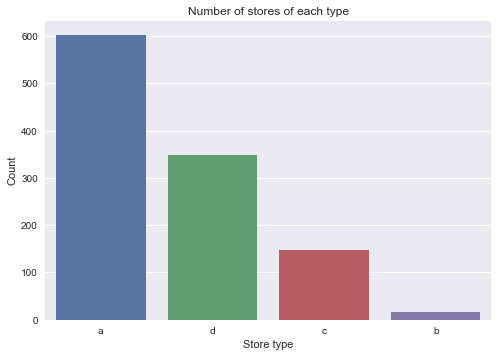

In [37]:
sns.barplot(data=df_store_types, x=df_store_types.index, y='store_type')
plt.title('Number of stores of each type')
plt.xlabel('Store type')
plt.ylabel('Count');

### Open or closed

In [38]:
data['open'].value_counts().to_frame()

,open
1,844392
0,172817


<b>Note:</b> In fact, number of sales and customers were '0' when the stores were closed.

In [39]:
data.loc[data['open']==0, 'sales'].sum()

0

In [40]:
data.loc[data['open']==0, 'customers'].sum()

0

### Customers

In [54]:
df_aux = data[data['customers']>0]

df_aux[['customers']].describe().T

,count,mean,std,min,25%,50%,75%,max
customers,844340.00,762.78,401.20,3.00,519.00,676.00,893.00,7388.00


In [57]:
df_aux[['customers', 'store_type']].groupby('store_type').describe()

customers                                                     
               count    mean    std   min     25%     50%     75%     max
store_type                                                               
a          457043.00  795.42 387.52  3.00  547.00  720.00  949.00 7388.00
b           15561.00 2022.08 910.80  5.00 1255.00 1839.00 2751.00 5494.00
c          112968.00  815.54 329.67 18.00  583.00  756.00  981.00 3096.00
d          258768.00  606.35 199.25 64.00  464.00  577.00  716.00 2239.00

In [63]:
df_aux.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval', 'month_map', 'is_promo', 'year',
       'month', 'day', 'week_of_year', 'competition_since',
       'competition_time_month', 'promo2_since'],
      dtype='object')

In [64]:
df_aux[['customers', 'state_holiday']].groupby('state_holiday').describe()

customers                                                \
                       count    mean     std    min    25%     50%     75%   
state_holiday                                                                
christimas_holiday     71.00 1569.23  884.91 190.00 890.50 1394.00 2093.00   
easter_holiday        145.00 1686.89 1234.62 116.00 559.00 1554.00 2498.00   
public_holiday        694.00 1279.17 1018.37 129.00 600.00  887.00 1752.50   
regular_day        843430.00  762.12  399.42   3.00 519.00  675.00  893.00   

                            
                       max  
state_holiday               
christimas_holiday 4468.00  
easter_holiday     5152.00  
public_holiday     5494.00  
regular_day        7388.00

<AxesSubplot:xlabel='customers', ylabel='Count'>

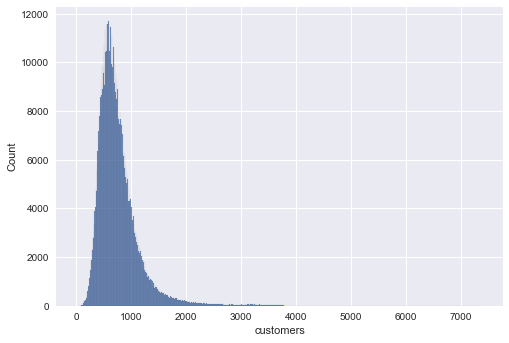

In [51]:
sns.histplot(data=df_aux, x='customers');

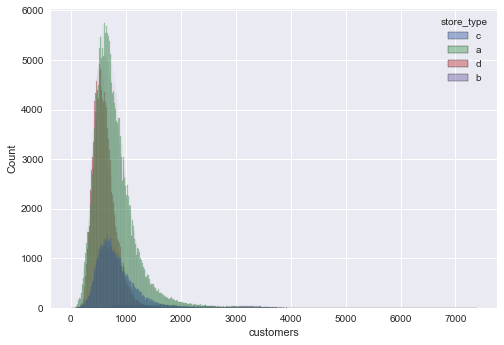

In [52]:
sns.histplot(data=df_aux, x='customers', hue='store_type');

<AxesSubplot:xlabel='store_type', ylabel='customers'>

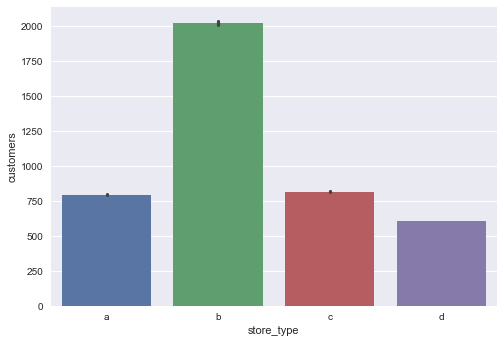

In [59]:
df_aux = df_aux.sort_values('store_type')
sns.barplot(data=df_aux, y='customers', x='store_t')

<AxesSubplot:xlabel='state_holiday', ylabel='customers'>

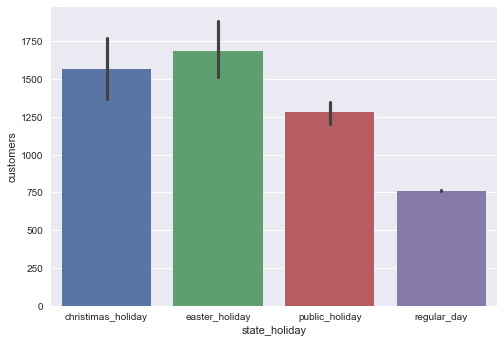

In [60]:
df_aux = df_aux.sort_values('state_holiday')
sns.barplot(data=df_aux, y='customers', x='state_holiday')

### Sales

In [66]:
data[['sales']].describe().T

,count,mean,std,min,25%,50%,75%,max
sales,1017209.00,5773.82,3849.93,0.00,3727.00,5744.00,7856.00,41551.00


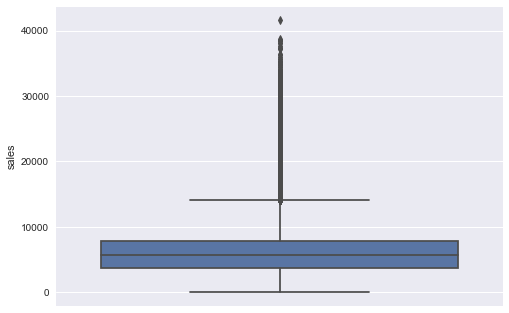

In [67]:
sns.boxplot(data=data, y='sales');

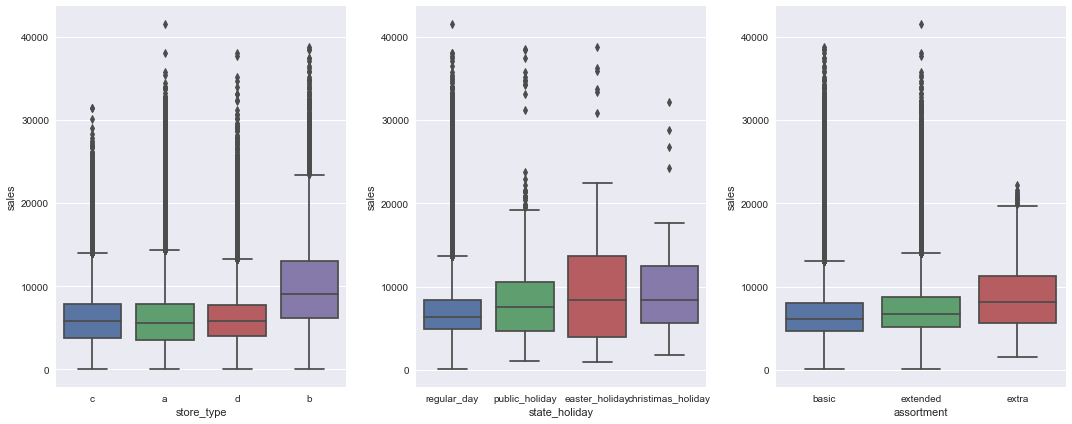

In [68]:
df_aux = data[data['sales']>0]
plt.figure(figsize=(15,6))
plt.subplot(1, 3, 1)
sns.boxplot(data=data, x='store_type', y='sales');

plt.subplot(1, 3, 2)
sns.boxplot(data=df_aux, x='state_holiday', y='sales')

plt.subplot(1, 3, 3)
sns.boxplot(data=df_aux, x='assortment', y='sales')
plt.tight_layout();

In [ ]:
### 

In [69]:
cat_attributes = data.select_dtypes(exclude=['int','float']).columns
print(cat_attributes)

Index(['date', 'state_holiday', 'store_type', 'assortment', 'promo_interval',
       'month_map', 'week_of_year', 'competition_since', 'promo2_since'],
      dtype='object')


In [ ]:
data['assortment'].value_counts()

In [ ]:
data['assortment'].map({'a':'basic', 'b':'extra', 'c':'extended'})

# Insights

Here, we verify some hypotheses and their possible business implications. 

### Hypothesis : The ...

<b>False.</b>  .<br> 
<b>Business implications:</b> 